# Kepler Framework Examples

In [1]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop
from kepler.pandas.decorators import create_ringer_v8_decorators, create_ringer_v9_decorators, RingerDecorator
from kepler.pandas.decorators import create_ringer_v8_new_decorators, create_ringer_v8_half_fast_decorators, create_ringer_v8_34_decorators, create_ringer_v8_half_decorators, create_ringer_v8_14_decorators, create_ringer_v12_decorators

import kepler
import tqdm
import rootplotlib as rpl
import mplhep as hep
import root_numpy
import ROOT
ROOT.gStyle.SetOptStat(0);
import array

import numpy as np
import pandas as pd
import collections
import os
from pprint import pprint
from copy import deepcopy
import gc


import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import mplhep as hep

import warnings
warnings.filterwarnings('ignore')
plt.style.use(hep.style.ROOT)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence


In [34]:
chain_list = {
    'e24_lhtight_nod0_{RINGER}_ivarloose':'L1_EM22VHI',
    'e26_lhtight_nod0_{RINGER}_ivarloose':'L1_EM22VHI',
    'e60_lhmedium_nod0_{RINGER}_L1EM24VHI':'L1_EM24VHI',
    'e140_lhloose_nod0_{RINGER}':'L1_EM24VHI',
}

steps = [
    'L2Calo',
    'L2',
    'EFCalo',
    'HLT',
]


default_algorithms = {#column_name:label
                      'noringer':'NoRinger',
                      'ringer_v8_new':'Ringer V8',
                      'ringer_v8_half':'Ringer V8.1/2',
                      }
selected_ringer = {
                    'ringer_v8_34':'Ringer V8.3/4',
                    #'ringer_v8_14':'Ringer V8.1/4',
                    #'ringer_v12':'Ringer V12(lor)',
                  }


ringer_list = list(default_algorithms.keys()) + list(selected_ringer.keys())

if len(ringer_list) != 4:
    raise ValueError
print(ringer_list)

label_list = list(default_algorithms.values()) + list(selected_ringer.values())
print(label_list)

['noringer', 'ringer_v8_new', 'ringer_v8_half', 'ringer_v8_34']
['NoRinger', 'Ringer V8', 'Ringer V8.1/2', 'Ringer V8.3/4']


# Running for Zee samples

## Load Data

In [37]:
# codigo modificado
dpath = '/home/pedro.lima/data/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins'
dpath+= '/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins_et{ET}_eta{ETA}.npz'
#                                               \
#                                           very loose
paths = []

dev = False
#    False carrega todas as regioes

if dev:
    range_et = [1]   #leblon = 4
    range_eta = [0]  #leblon = 0
else:
    range_et = range(5)
    range_eta = range(5)

for et in range_et:
    for eta in range_eta:
        paths.append( dpath.format(ET=et,ETA=eta) )
# look here: https://github.com/ringer-softwares/kolmov/blob/master/kolmov/utils/constants.py

In [38]:
drop_columns = [
                    'RunNumber', 
                    #'avgmu',
                    #'trig_L2_cl_et',
                    #'trig_L2_cl_eta',
                    #'trig_L2_cl_phi',
                    #'trig_L2_cl_reta',
                    #'trig_L2_cl_ehad1', 
                    #'trig_L2_cl_eratio',
                    #'trig_L2_cl_f1', 
                    #'trig_L2_cl_f3', 
                    #'trig_L2_cl_weta2', 
                    #'trig_L2_cl_wstot', 
                    'trig_L2_cl_e2tsts1',
                    'trig_L2_el_hastrack',
                    #'trig_L2_el_pt',
                    'trig_L2_el_eta',
                    'trig_L2_el_phi',
                    'trig_L2_el_caloEta',
                    'trig_L2_el_trkClusDeta',
                    'trig_L2_el_trkClusDphi',
                    'trig_L2_el_etOverPt',
                    'trig_EF_cl_hascluster',
                    #'trig_EF_cl_et',
                    'trig_EF_cl_eta',
                    'trig_EF_cl_etaBE2',
                    'trig_EF_cl_phi',     
                    'trig_EF_el_hascand',
                    #'trig_EF_el_et',
                    'trig_EF_el_eta',
                    'trig_EF_el_etaBE2',
                    'trig_EF_el_phi',
                    'trig_EF_el_rhad1',
                    'trig_EF_el_rhad',
                    'trig_EF_el_f3',
                    'trig_EF_el_weta2',
                    'trig_EF_el_rphi',
                    'trig_EF_el_reta',
                    'trig_EF_el_wtots1',
                    'trig_EF_el_eratio',
                    'trig_EF_el_f1',
                    'trig_EF_el_hastrack',
                    'trig_EF_el_deltaEta1',
                    'trig_EF_el_deltaPhi2',
                    'trig_EF_el_deltaPhi2Rescaled',
                    #'trig_EF_el_lhtight',
                    #'trig_EF_el_lhmedium',
                    #'trig_EF_el_lhloose',
                    #'trig_EF_el_lhvloose', 
                    # Offline variables
                    #'el_et',
                    #'el_eta',
                    'el_etaBE2',
                    #'el_phi',
                    # offline shower shapers
                    #'el_rhad1',
                    #'el_rhad',
                    #'el_f3',
                    #'el_weta2',
                    #'el_rphi',
                    #'el_reta',
                    #'el_wtots1',
                    #'el_eratio',
                    #'el_f1',
                    # offline track
                    #'el_hastrack',
                    'el_numberOfBLayerHits',
                    'el_numberOfPixelHits',
                    'el_numberOfTRTHits',
                    #'el_d0',
                    #'el_d0significance',
                    #'el_eProbabilityHT',
                    'el_trans_TRT_PID',
                    #'el_deltaEta1',
                    'el_deltaPhi2',
                    #'el_deltaPhi2Rescaled',
                    #'el_deltaPOverP',
                    #'el_lhtight',
                    #'el_lhmedium',
                    #'el_lhloose',
                    #'el_lhvloose',
                    'el_TaP_Mass',
                    #'el_TaP_deltaR',
                ] 

# variaveis dos aneis...para plotar o perfil médio, preciso deixar
#drop_columns.extend( ['trig_L2_cl_ring_%d'%i for i in range(100)] )

In [39]:
os.environ['RINGER_TUNING_PATH']='/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings'

decorators = create_ringer_v8_new_decorators()
decorators += create_ringer_v8_half_fast_decorators()
decorators += create_ringer_v8_34_decorators()
#decorators += create_ringer_v8_14_decorators()
#decorators += create_ringer_v12_decorators()

2022-12-13 16:49:02,909 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerTightTriggerConfig.conf
2022-12-13 16:49:03,368 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerMediumTriggerConfig.conf
2022-12-13 16:49:03,824 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerLooseTriggerConfig.conf
2022-12-13 16:49:04,578 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerVeryLooseTriggerConfig.conf
2022-12-13 16:49:05,027 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20210907_v8-1/ElectronRin

## Setup Chains

ivarloose - é o isolamento loose. Olhar https://twiki.cern.ch/twiki/bin/view/Atlas/TriggerNamingRun2    https://twiki.cern.ch/twiki/bin/view/Atlas/TriggerMenuConvention

ivarloose (Run2 que deve ser mantido para o Run3)- HLT isolation: ptvarcone20/ET<0.1

O pid_name da cadeia está marcado no `lh*` , onde * é o pid_name (ponto de operação da cadeia)

In [40]:
chains = list()

for chain in chain_list:
    for alg in ringer_list:
        if alg == 'noringer':
            chains.append(Chain(("HLT_"+chain).format(RINGER=alg), L1Seed = chain_list[chain]))
        else:
            chains.append(Chain(("HLT_"+chain).format(RINGER=alg), L1Seed = chain_list[chain], l2calo_column = alg+'_'+(chain.split('_')[1][2:])))

OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'trig_L2_cl_lhtight_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_new_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_half_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_34_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
Ordered

## Read all bins

In [41]:
table = load_in_loop( paths, drop_columns=drop_columns, decorators=decorators, chains=chains )

Reading files...:   0%|          | 0/25 [00:00<?, ?it/s]

Reading files...: 100%|██████████| 25/25 [51:29<00:00, 123.59s/it]


In [42]:
if True:
    print(table.columns.to_list())

['avgmu', 'trig_L2_cl_et', 'trig_L2_cl_eta', 'trig_L2_cl_phi', 'trig_L2_cl_reta', 'trig_L2_cl_ehad1', 'trig_L2_cl_eratio', 'trig_L2_cl_f1', 'trig_L2_cl_f3', 'trig_L2_cl_weta2', 'trig_L2_cl_wstot', 'trig_L2_cl_ring_0', 'trig_L2_cl_ring_1', 'trig_L2_cl_ring_2', 'trig_L2_cl_ring_3', 'trig_L2_cl_ring_4', 'trig_L2_cl_ring_5', 'trig_L2_cl_ring_6', 'trig_L2_cl_ring_7', 'trig_L2_cl_ring_8', 'trig_L2_cl_ring_9', 'trig_L2_cl_ring_10', 'trig_L2_cl_ring_11', 'trig_L2_cl_ring_12', 'trig_L2_cl_ring_13', 'trig_L2_cl_ring_14', 'trig_L2_cl_ring_15', 'trig_L2_cl_ring_16', 'trig_L2_cl_ring_17', 'trig_L2_cl_ring_18', 'trig_L2_cl_ring_19', 'trig_L2_cl_ring_20', 'trig_L2_cl_ring_21', 'trig_L2_cl_ring_22', 'trig_L2_cl_ring_23', 'trig_L2_cl_ring_24', 'trig_L2_cl_ring_25', 'trig_L2_cl_ring_26', 'trig_L2_cl_ring_27', 'trig_L2_cl_ring_28', 'trig_L2_cl_ring_29', 'trig_L2_cl_ring_30', 'trig_L2_cl_ring_31', 'trig_L2_cl_ring_32', 'trig_L2_cl_ring_33', 'trig_L2_cl_ring_34', 'trig_L2_cl_ring_35', 'trig_L2_cl_ring_36',

In [43]:
table.head()

,avgmu,trig_L2_cl_et,trig_L2_cl_eta,trig_L2_cl_phi,trig_L2_cl_reta,trig_L2_cl_ehad1,trig_L2_cl_eratio,trig_L2_cl_f1,trig_L2_cl_f3,trig_L2_cl_weta2,...,L1Calo_e140_lhloose_nod0_ringer_v8_half,L2Calo_e140_lhloose_nod0_ringer_v8_half,L2_e140_lhloose_nod0_ringer_v8_half,EFCalo_e140_lhloose_nod0_ringer_v8_half,HLT_e140_lhloose_nod0_ringer_v8_half,L1Calo_e140_lhloose_nod0_ringer_v8_34,L2Calo_e140_lhloose_nod0_ringer_v8_34,L2_e140_lhloose_nod0_ringer_v8_34,EFCalo_e140_lhloose_nod0_ringer_v8_34,HLT_e140_lhloose_nod0_ringer_v8_34
0,44.700001,19273.964844,0.099392,-2.523894,0.972962,-190.000000,0.948686,0.388993,0.008554,0.009378,...,False,False,False,False,False,False,False,False,False,False
1,44.700001,19330.248047,0.264886,-1.784419,0.953338,-39.500000,0.948622,0.321716,0.003106,0.009217,...,False,False,False,False,False,False,False,False,False,False
2,44.700001,15270.058594,-0.249952,-0.758099,1.013074,-249.500000,0.883187,0.487872,0.002307,0.008863,...,False,False,False,False,False,False,False,False,False,False
3,44.630001,17340.074219,0.582413,-1.097990,1.028176,148.000000,0.926765,0.426812,-0.000522,0.010547,...,False,False,False,False,False,False,False,False,False,False
4,44.580002,15489.009766,-0.697643,-2.718542,1.061034,711.230164,0.974475,0.404273,-0.000863,0.009515,...,False,False,False,False,False,False,False,False,False,False


## Efficiency plots

6581


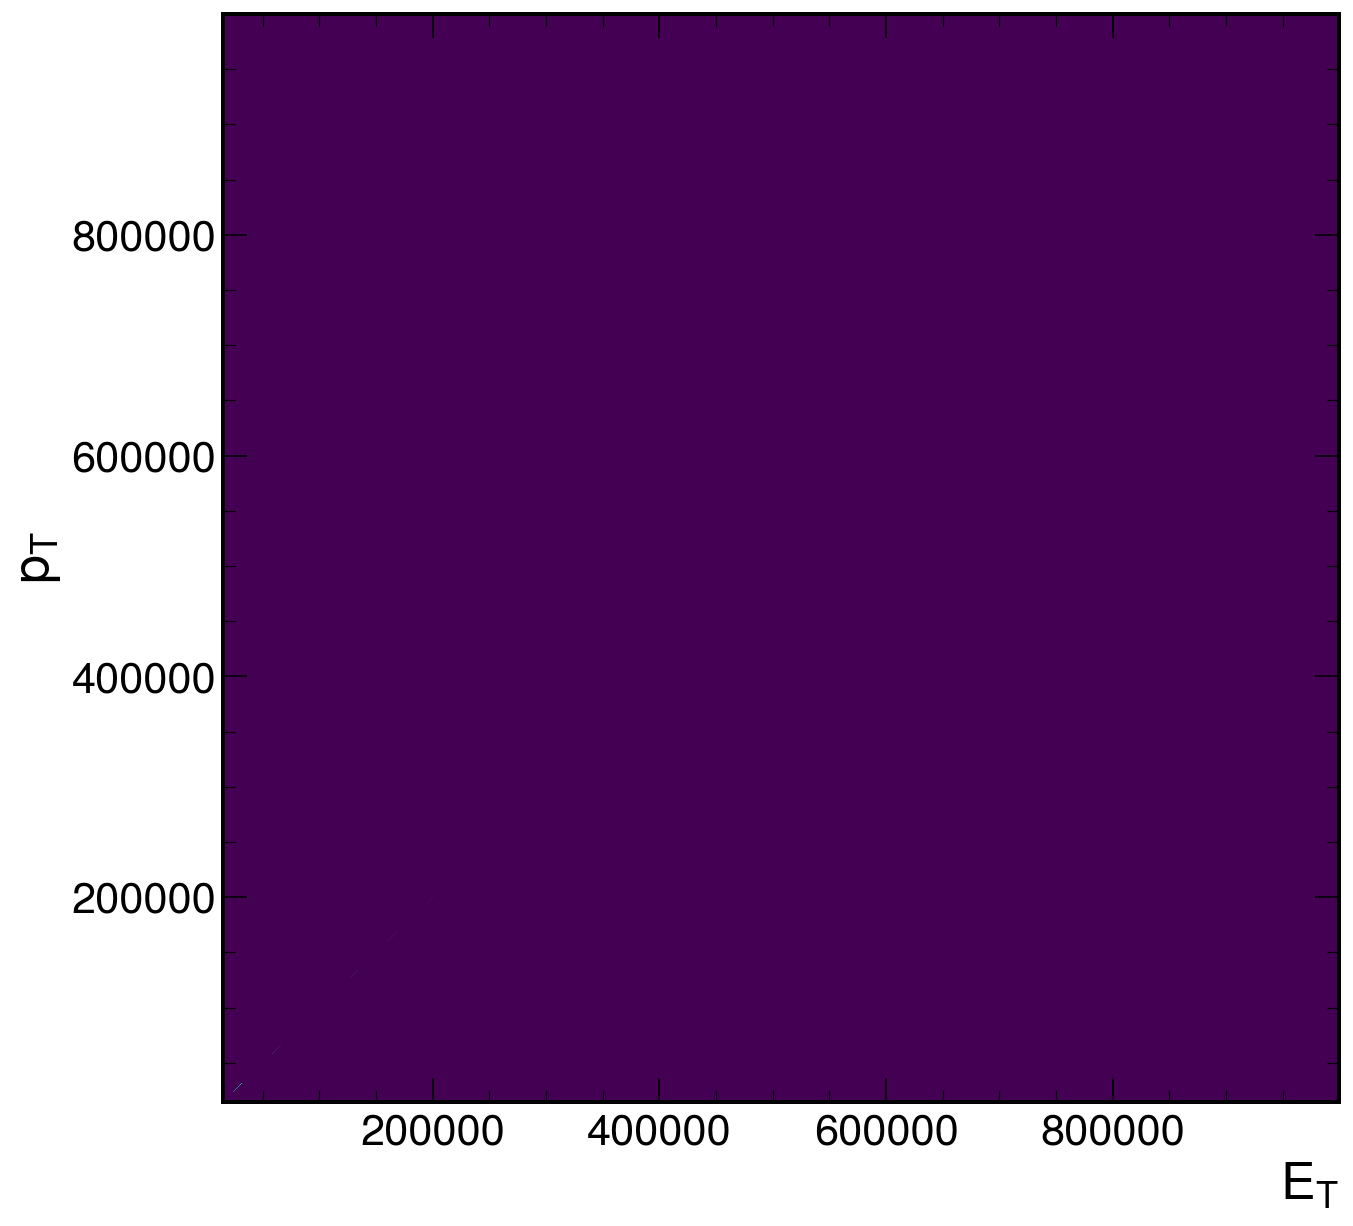

In [44]:
dr = 'el_TaP_deltaR'
et = 'trig_L2_cl_et'
pt = 'trig_L2_cl_et'

dr = table[dr]
et = table[et]
pt = table[pt]

bins = int(np.sqrt(table.shape[0]))
print(bins)

plt.hist2d(et, pt, bins = bins)
plt.xlabel('$E_T$')
plt.ylabel('$p_T$', loc = 'center')
plt.show()

# Running for Boosted

In [2]:
chain_list = {
    'e24_lhtight_nod0_{RINGER}_ivarloose':'L1_EM22VHI',
    'e26_lhtight_nod0_{RINGER}_ivarloose':'L1_EM22VHI',
    'e60_lhmedium_nod0_{RINGER}_L1EM24VHI':'L1_EM24VHI',
    'e140_lhloose_nod0_{RINGER}':'L1_EM24VHI',
}

steps = [
    'L2Calo',
    'L2',
    'EFCalo',
    'HLT',
]


default_algorithms = {#column_name:label
                      'noringer':'NoRinger',
                      'ringer_v8_new':'Ringer V8',
                      'ringer_v8_half':'Ringer V8.1/2',
                      }
selected_ringer = {
                    'ringer_v8_34':'Ringer V8.3/4',
                    #'ringer_v8_14':'Ringer V8.1/4',
                    #'ringer_v12':'Ringer V12(lor)',
                  }


ringer_list = list(default_algorithms.keys()) + list(selected_ringer.keys())

if len(ringer_list) != 4:
    raise ValueError
print(ringer_list)

label_list = list(default_algorithms.values()) + list(selected_ringer.values())
print(label_list)

['noringer', 'ringer_v8_new', 'ringer_v8_half', 'ringer_v8_34']
['NoRinger', 'Ringer V8', 'Ringer V8.1/2', 'Ringer V8.3/4']


## Load Data

In [3]:
# codigo modificado
boosted_dpath = '/home/pedro.lima/data/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins.v2'
boosted_dpath+= '/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins.v2_et{ET}_eta{ETA}.npz'
boosted_paths = []

leblon = False
lor = False

if leblon:
    for et in [4]:
        for eta in [0]:
            boosted_paths.append( boosted_dpath.format(ET=et,ETA=eta) )
            
elif lor:
    for et in range(3):
        for eta in [0]:
            boosted_paths.append( boosted_dpath.format(ET=et,ETA=eta) )
            
else:
    for et in range(5):
        for eta in range(5):
            boosted_paths.append( boosted_dpath.format(ET=et,ETA=eta) )

In [4]:
drop_columns = [
                    'RunNumber', 
                    #'avgmu',
                    #'trig_L2_cl_et',
                    #'trig_L2_cl_eta',
                    #'trig_L2_cl_phi',
                    #'trig_L2_cl_reta',
                    #'trig_L2_cl_ehad1', 
                    #'trig_L2_cl_eratio',
                    #'trig_L2_cl_f1', 
                    #'trig_L2_cl_f3', 
                    #'trig_L2_cl_weta2', 
                    #'trig_L2_cl_wstot', 
                    'trig_L2_cl_e2tsts1',
                    'trig_L2_el_hastrack',
                    #'trig_L2_el_pt',
                    'trig_L2_el_eta',
                    'trig_L2_el_phi',
                    'trig_L2_el_caloEta',
                    'trig_L2_el_trkClusDeta',
                    'trig_L2_el_trkClusDphi',
                    'trig_L2_el_etOverPt',
                    'trig_EF_cl_hascluster',
                    #'trig_EF_cl_et',
                    'trig_EF_cl_eta',
                    'trig_EF_cl_etaBE2',
                    'trig_EF_cl_phi',     
                    'trig_EF_el_hascand',
                    #'trig_EF_el_et',
                    'trig_EF_el_eta',
                    'trig_EF_el_etaBE2',
                    'trig_EF_el_phi',
                    'trig_EF_el_rhad1',
                    'trig_EF_el_rhad',
                    'trig_EF_el_f3',
                    'trig_EF_el_weta2',
                    'trig_EF_el_rphi',
                    'trig_EF_el_reta',
                    'trig_EF_el_wtots1',
                    'trig_EF_el_eratio',
                    'trig_EF_el_f1',
                    'trig_EF_el_hastrack',
                    'trig_EF_el_deltaEta1',
                    'trig_EF_el_deltaPhi2',
                    'trig_EF_el_deltaPhi2Rescaled',
                    #'trig_EF_el_lhtight',
                    #'trig_EF_el_lhmedium',
                    #'trig_EF_el_lhloose',
                    #'trig_EF_el_lhvloose', 
                    # Offline variables
                    #'el_et',
                    #'el_eta',
                    'el_etaBE2',
                    #'el_phi',
                    # offline shower shapers
                    #'el_rhad1',
                    #'el_rhad',
                    #'el_f3',
                    #'el_weta2',
                    #'el_rphi',
                    #'el_reta',
                    #'el_wtots1',
                    #'el_eratio',
                    #'el_f1',
                    # offline track
                    #'el_hastrack',
                    'el_numberOfBLayerHits',
                    'el_numberOfPixelHits',
                    'el_numberOfTRTHits',
                    #'el_d0',
                    #'el_d0significance',
                    #'el_eProbabilityHT',
                    'el_trans_TRT_PID',
                    #'el_deltaEta1',
                    'el_deltaPhi2',
                    #'el_deltaPhi2Rescaled',
                    #'el_deltaPOverP',
                    #'el_lhtight',
                    #'el_lhmedium',
                    #'el_lhloose',
                    #'el_lhvloose',
                    'el_TaP_Mass',
                    #'el_TaP_deltaR',
                ]

#drop_columns.extend( ['trig_L2_cl_ring_%d'%i for i in range(100)] )

In [5]:
os.environ['RINGER_TUNING_PATH']='/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings'

decorators = create_ringer_v8_new_decorators()
decorators += create_ringer_v8_half_fast_decorators()
#decorators+= create_ringer_v9_decorators()
decorators += create_ringer_v8_34_decorators()
#decorators += create_ringer_v8_14_decorators()
#decorators += create_ringer_v12_decorators()

2022-12-15 11:52:35,794 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerTightTriggerConfig.conf
2022-12-15 11:52:36,318 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerMediumTriggerConfig.conf
2022-12-15 11:52:36,761 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerLooseTriggerConfig.conf
2022-12-15 11:52:37,209 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerVeryLooseTriggerConfig.conf
2022-12-15 11:52:37,660 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20210907_v8-1/ElectronRin

2022-12-15 11:52:35.816062: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-12-15 11:52:35.816104: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: UNKNOWN ERROR (-1)
2022-12-15 11:52:35.816122: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (caloba53): /proc/driver/nvidia/version does not exist
2022-12-15 11:52:35.816354: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 11:52:35.833614: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2394370000 Hz
2022-12-15 11:52:35.843956: I tensorflow/compiler/xla/service/service.c

## Setup Chains

In [6]:
chains = list()

for chain in chain_list:
    for alg in ringer_list:
        if alg == 'noringer':
            chains.append(Chain(("HLT_"+chain).format(RINGER=alg), L1Seed = chain_list[chain]))
        else:
            chains.append(Chain(("HLT_"+chain).format(RINGER=alg), L1Seed = chain_list[chain], l2calo_column = alg+'_'+(chain.split('_')[1][2:])))

OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'trig_L2_cl_lhtight_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_new_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_half_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_34_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
Ordered

## Read all bins

In [7]:
boosted_table = load_in_loop( boosted_paths, drop_columns=drop_columns, decorators=decorators, chains=chains )

Reading files...:   0%|          | 0/25 [00:00<?, ?it/s]

Reading files...:   4%|▍         | 1/25 [00:01<00:28,  1.17s/it]

Reading files...:   8%|▊         | 2/25 [00:02<00:25,  1.11s/it]

Reading files...:  12%|█▏        | 3/25 [00:03<00:24,  1.09s/it]

Reading files...:  16%|█▌        | 4/25 [00:04<00:22,  1.09s/it]

Reading files...:  20%|██        | 5/25 [00:05<00:21,  1.09s/it]

Reading files...:  24%|██▍       | 6/25 [00:06<00:20,  1.10s/it]

Reading files...:  28%|██▊       | 7/25 [00:07<00:19,  1.10s/it]

Reading files...:  32%|███▏      | 8/25 [00:08<00:18,  1.10s/it]

Reading files...:  36%|███▌      | 9/25 [00:09<00:17,  1.11s/it]

Reading files...:  40%|████      | 10/25 [00:11<00:16,  1.11s/it]

Reading files...:  44%|████▍     | 11/25 [00:12<00:15,  1.12s/it]

Reading files...:  48%|████▊     | 12/25 [00:13<00:14,  1.13s/it]

Reading files...:  52%|█████▏    | 13/25 [00:14<00:13,  1.13s/it]

Reading files...:  56%|█████▌    | 14/25 [00:15<00:12,  1.14s/it]

Reading files...:  60%|██████    | 15/25 [00:16<00:11,  1.13s/it]

Reading files...:  64%|██████▍   | 16/25 [00:17<00:10,  1.14s/it]

Reading files...:  68%|██████▊   | 17/25 [00:19<00:09,  1.14s/it]

Reading files...:  72%|███████▏  | 18/25 [00:20<00:07,  1.14s/it]

Reading files...:  76%|███████▌  | 19/25 [00:21<00:06,  1.15s/it]

Reading files...:  80%|████████  | 20/25 [00:22<00:05,  1.15s/it]

Reading files...:  96%|█████████▌| 24/25 [00:30<00:01,  1.66s/it]

Reading files...: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]


In [8]:
if True:
    print(boosted_table.columns.to_list())

['avgmu', 'trig_L2_cl_et', 'trig_L2_cl_eta', 'trig_L2_cl_phi', 'trig_L2_cl_reta', 'trig_L2_cl_ehad1', 'trig_L2_cl_eratio', 'trig_L2_cl_f1', 'trig_L2_cl_f3', 'trig_L2_cl_weta2', 'trig_L2_cl_wstot', 'trig_L2_cl_ring_0', 'trig_L2_cl_ring_1', 'trig_L2_cl_ring_2', 'trig_L2_cl_ring_3', 'trig_L2_cl_ring_4', 'trig_L2_cl_ring_5', 'trig_L2_cl_ring_6', 'trig_L2_cl_ring_7', 'trig_L2_cl_ring_8', 'trig_L2_cl_ring_9', 'trig_L2_cl_ring_10', 'trig_L2_cl_ring_11', 'trig_L2_cl_ring_12', 'trig_L2_cl_ring_13', 'trig_L2_cl_ring_14', 'trig_L2_cl_ring_15', 'trig_L2_cl_ring_16', 'trig_L2_cl_ring_17', 'trig_L2_cl_ring_18', 'trig_L2_cl_ring_19', 'trig_L2_cl_ring_20', 'trig_L2_cl_ring_21', 'trig_L2_cl_ring_22', 'trig_L2_cl_ring_23', 'trig_L2_cl_ring_24', 'trig_L2_cl_ring_25', 'trig_L2_cl_ring_26', 'trig_L2_cl_ring_27', 'trig_L2_cl_ring_28', 'trig_L2_cl_ring_29', 'trig_L2_cl_ring_30', 'trig_L2_cl_ring_31', 'trig_L2_cl_ring_32', 'trig_L2_cl_ring_33', 'trig_L2_cl_ring_34', 'trig_L2_cl_ring_35', 'trig_L2_cl_ring_36',

## Efficiency plots

### Efficiency with respect to $\Delta R$

In [25]:
boosted_table['trig_L2_cl_et']

0         17387.986328
1         18339.359375
2         19970.226562
3         17113.560547
4         18358.531250
             ...      
78909    128075.187500
78910    185787.984375
78911    209329.828125
78912    450941.250000
78913    450941.250000
Name: trig_L2_cl_et, Length: 78914, dtype: float32

No handles with labels found to put in legend.


280


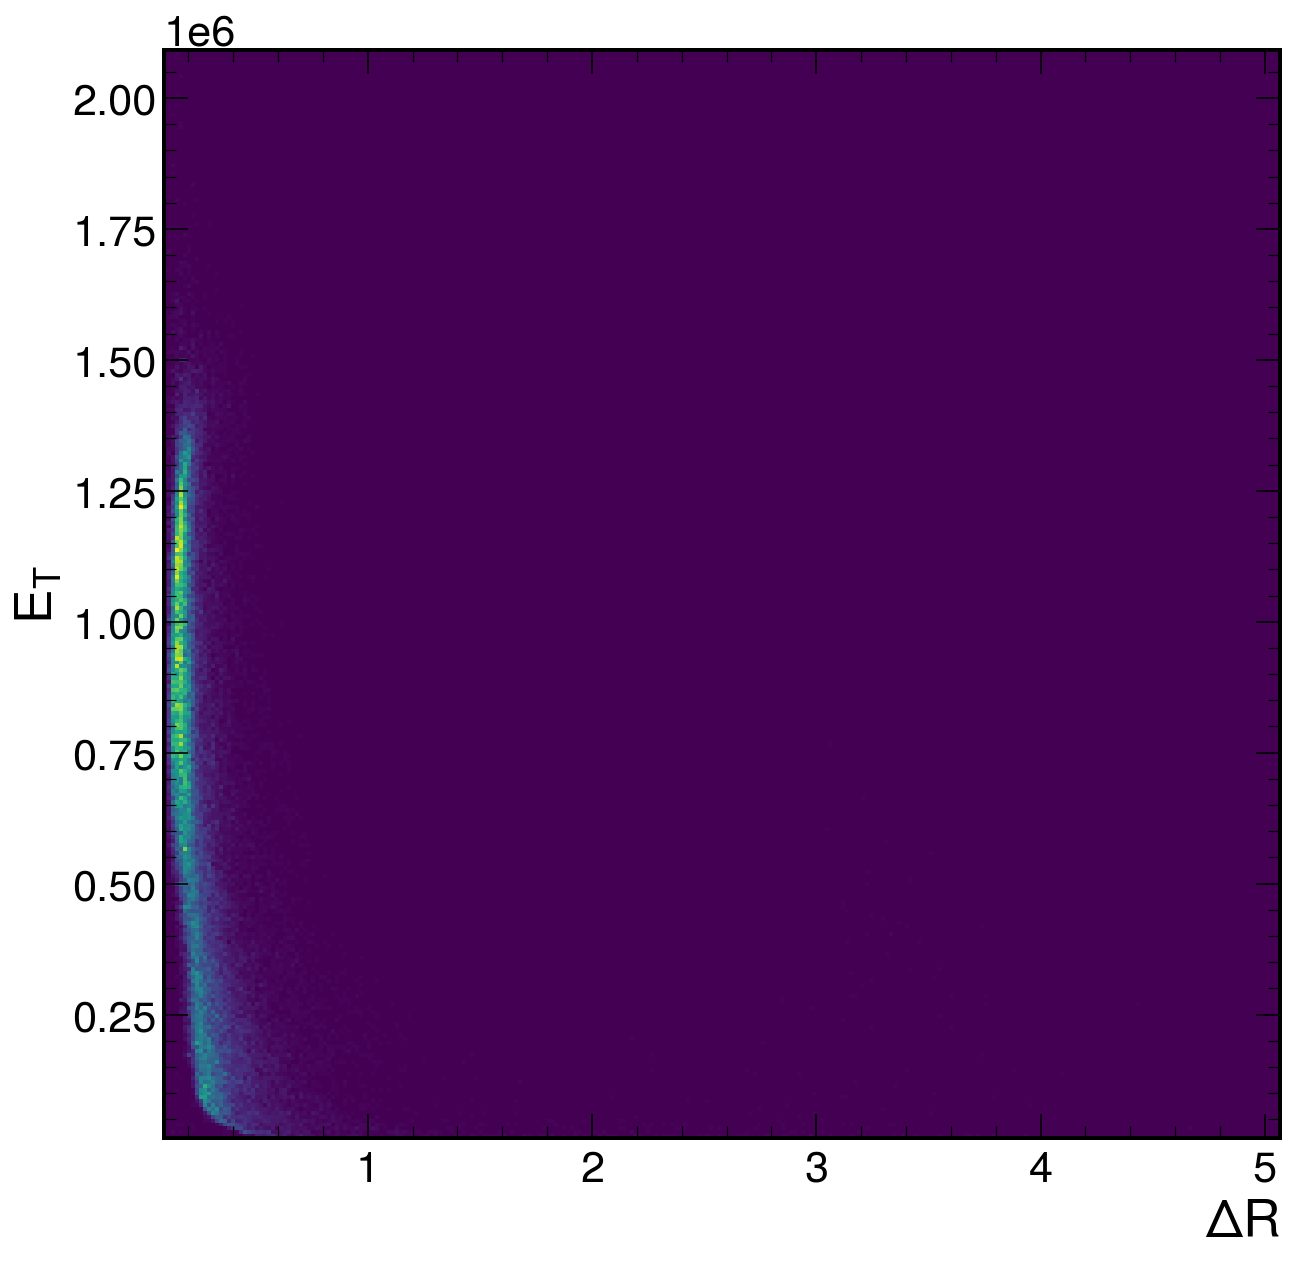

In [29]:
dr = 'el_TaP_deltaR'
et = 'trig_L2_cl_et'

dr = boosted_table[dr]
et = boosted_table[et]

bins = int(np.sqrt(boosted_table.shape[0]))
print(bins)

plt.hist2d(dr, et, bins = bins)
plt.xlabel('$\Delta R$')
plt.ylabel('$E_T$', loc = 'center')
plt.show()

280
0         17387.986328
1         18339.359375
2         19970.226562
3         17113.560547
4         18358.531250
             ...      
78909    128075.187500
78910    185787.984375
78911    209329.828125
78912    450941.250000
78913    450941.250000
Name: trig_L2_el_pt, Length: 78914, dtype: float32


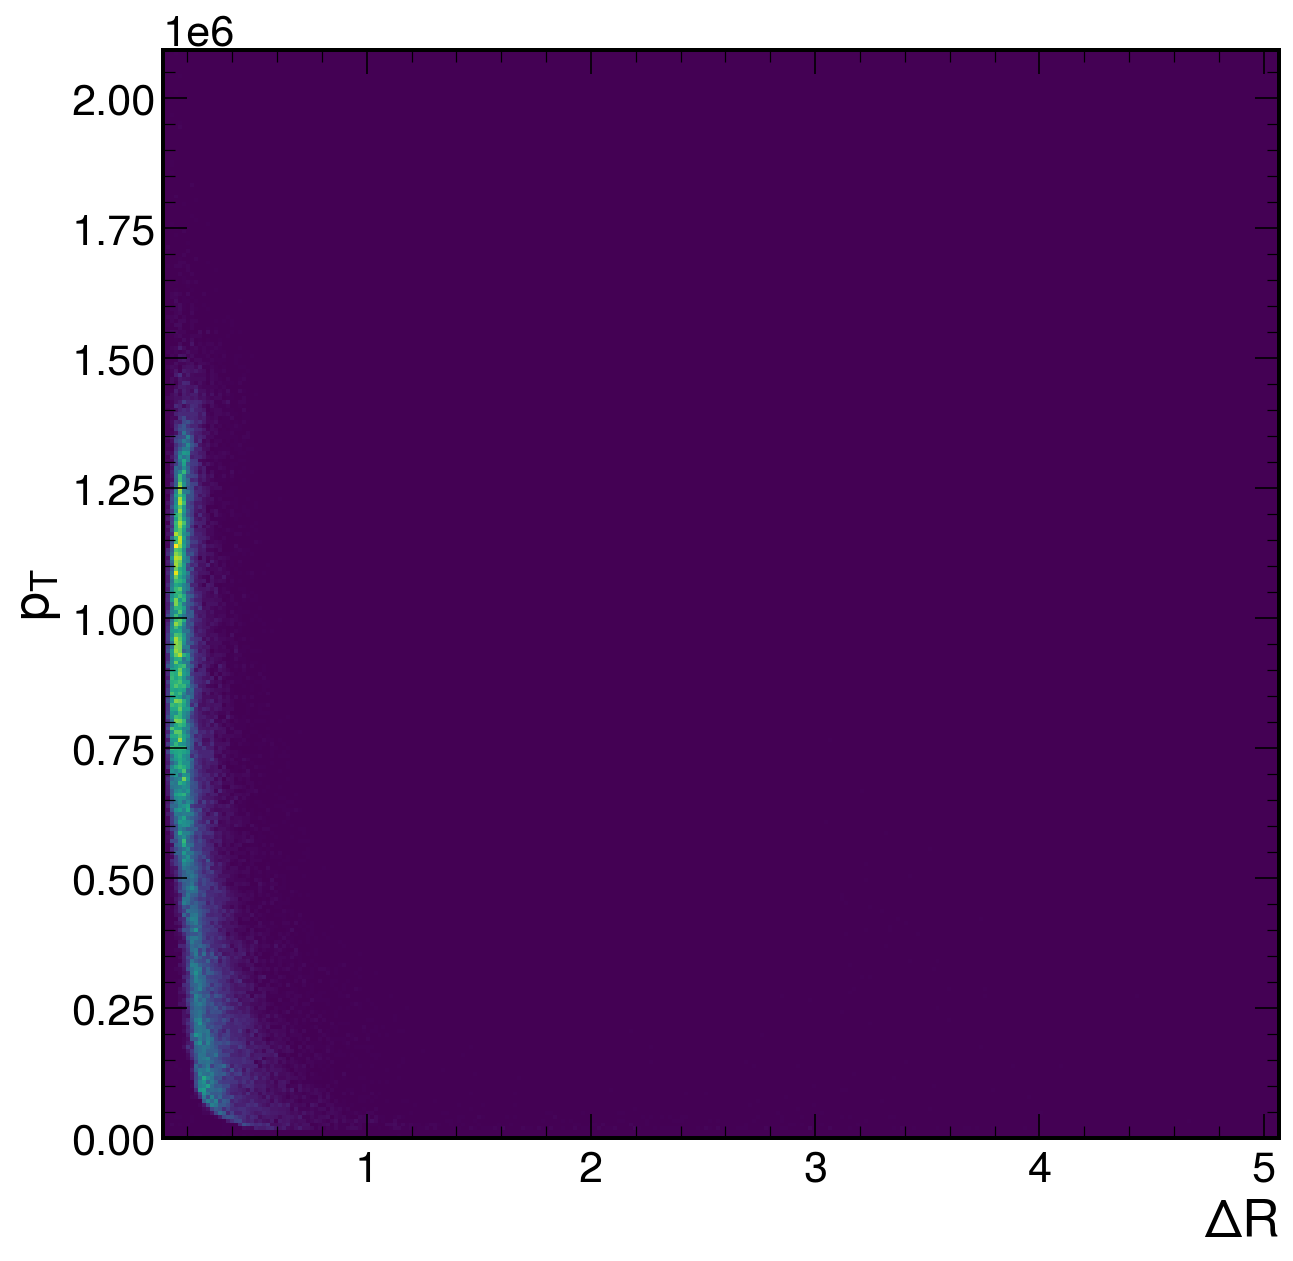

In [33]:
dr = 'el_TaP_deltaR'
pt = 'trig_L2_el_pt'

dr = boosted_table[dr]
pt = boosted_table[pt]

bins = int(np.sqrt(boosted_table.shape[0]))
print(bins)

print(pt)

plt.hist2d(dr, pt, bins = bins)
plt.xlabel('$\Delta R$')
plt.ylabel('$p_T$', loc = 'center')
plt.show()

19


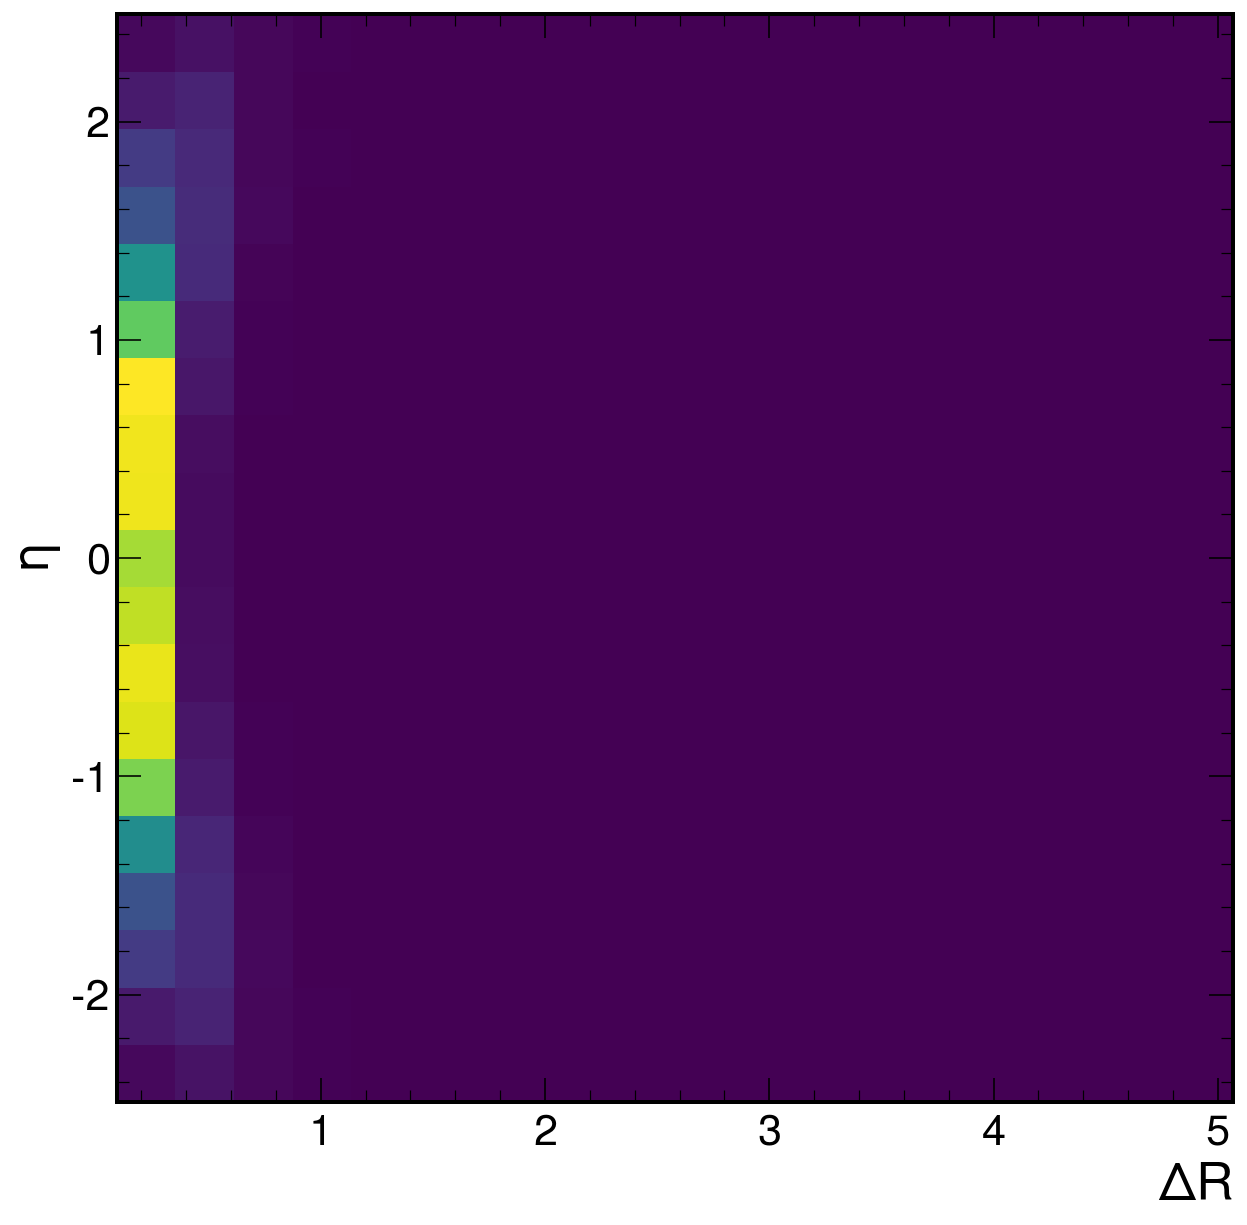

In [10]:
dr = 'el_TaP_deltaR'
eta = 'trig_L2_cl_eta'

dr = boosted_table[dr]
eta= boosted_table[eta]

#bins = int(np.sqrt(boosted_table.shape[0]))
bins = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.35, 0.40, 0.6]
bins = len(bins)
print(bins)


plt.hist2d(dr, eta, bins = 19)
plt.xlabel('$\Delta R$')
plt.ylabel('$\eta$', loc = 'center')
plt.show()

### Efficiency with respect to $pT$

In [27]:
def make_pt_plot(dataframe, chain, fake=False):
    var = 'trig_L2_el_pt'
    from Gaugi.constants import GeV, MeV
    # plot in eta need sum 1 in chain threshold 

    #m_bins = [4,7,10,15,20,25,30,35,40,45,50,60,80,150,300] # et_bins
    #m_bins = [15, 20, 30, 40, 50, 1000000]
    m_bins = np.arange(0, 2000*10**3, step=50*10**3).tolist()
    et_cut  = int(chain.split('_')[1][1:])
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) &\
                               (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                      *GeV
    else:
        offline = chain.split('_')[2]
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('pt_b_num', passed[var]/MeV, m_bins )
    #                                               /GeV
    h_den = hist1d('pt_b_den', total[var]/MeV, m_bins )
    #                                              /GeV
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

In [ ]:
for step in ['L2Calo', 'L2', 'EFCalo', 'HLT']:
#step = 'L2'
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/pt'

    for chain in chain_list:
        
        trigger = step+'_'+chain

        m_info = np.array([make_pt_plot(boosted_table, trigger.format(RINGER=alg)) for alg in ringer_list])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], 'pT [MeV]', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(label_list):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text(0.55, 0.4, 'Boosted', textsize=0.04)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=0, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/eff_boosted_pt_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_pt_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_pt_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/pt/eff_boosted_pt_L2Calo_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/pt/eff_boosted_pt_L2Calo_e26_lhtight_root


### Efficiency with respect to $< \mu >$

In [ ]:
def make_mu_plot(dataframe, chain, fake=False):
    var = 'avgmu'
    from Gaugi.constants import GeV, MeV
    # plot in eta need sum 1 in chain threshold 

    #m_bins = [4,7,10,15,20,25,30,35,40,45,50,60,80,150,300] # et_bins
    #m_bins = [15, 20, 30, 40, 50, 1000000]
    #m_bins = [10, 20, 30, 40, 50, 60, 70]
    m_bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
    et_cut  = int(chain.split('_')[1][1:])
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) &\
                               (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                      *GeV
    else:
        offline = chain.split('_')[2]
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('mu_b_num', passed[var]/MeV, m_bins )
    #                                               /GeV
    h_den = hist1d('mu_b_den', total[var]/MeV, m_bins )
    #                                              /GeV
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

In [ ]:
for step in ['L2Calo', 'L2', 'EFCalo', 'HLT']:
#step = 'L2'
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/mu'

    for chain in chain_list:
        
        trigger = step+'_'+chain

        m_info = np.array([make_mu_plot(boosted_table, trigger.format(RINGER=alg)) for alg in ringer_list])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], '< #mu >', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(label_list):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text(0.55, 0.4, 'Boosted', textsize=0.04)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=0, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/eff_boosted_mu_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_mu_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_mu_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

In [ ]:
print('End of script')